In [565]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.preprocessing import LabelEncoder
import pprint
import matplotlib.pyplot as plt

# To consider empty string and numpu.inf as NA values we use use below statement
pd.options.mode.use_inf_as_na = True

data = pd.read_excel('lab02_dataset_2.xlsx', engine='openpyxl')
data.head()

/var/folders/q3/91x5m0k55jz1bvt_fqnvcwn00000gn/T/ipykernel_2152/3654751738.py:8: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,TIF,CAR_TYPE,RED_CAR,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,CLM_AMT,CLM_COUNT,EXPOSURE
0,63581743,0,1939-03-16,60.0,0,11.0,67000.0,No,NaN,No,...,11,Minivan,yes,No,3,18.0,Highly Urban/ Urban,0,0,0.189
1,132761049,0,1956-01-21,43.0,0,11.0,91000.0,No,257000.0,No,...,1,Minivan,yes,No,0,1.0,Highly Urban/ Urban,0,0,1.000
2,921317019,0,1951-11-18,48.0,0,11.0,53000.0,No,NaN,No,...,1,Van,yes,No,2,10.0,Highly Urban/ Urban,0,0,1.000
3,727598473,0,1964-03-05,35.0,1,10.0,16000.0,No,124000.0,Yes,...,4,SUV,no,No,3,10.0,Highly Urban/ Urban,0,0,0.828
4,450221861,0,1948-06-05,51.0,0,14.0,NaN,No,306000.0,Yes,...,7,Minivan,yes,No,0,6.0,Highly Urban/ Urban,0,0,0.729


In [566]:
data.tail()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,TIF,CAR_TYPE,RED_CAR,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,CLM_AMT,CLM_COUNT,EXPOSURE
10297,67790126,1,1954-08-13,45.0,2,9.0,165000.0,No,386000.0,Yes,...,15,Minivan,no,No,2,17.0,Highly Urban/ Urban,0,0,1.0
10298,61970712,0,1953-06-17,46.0,0,9.0,107000.0,No,333000.0,Yes,...,6,Panel Truck,no,No,0,1.0,Highly Urban/ Urban,0,0,1.0
10299,849208064,0,1951-06-18,48.0,0,15.0,40000.0,No,171000.0,Yes,...,7,SUV,no,No,0,1.0,Highly Urban/ Urban,0,0,1.0
10300,627828331,0,1948-12-12,50.0,0,7.0,43000.0,No,149000.0,Yes,...,6,Minivan,no,No,0,11.0,Highly Urban/ Urban,0,0,1.0
10301,680381960,0,1947-02-27,52.0,0,11.0,53000.0,No,197000.0,Yes,...,6,Minivan,no,No,0,9.0,Highly Rural/ Rural,0,0,1.0


In [567]:
data = pd.DataFrame({
    'CAR_TYPE' : data['CAR_TYPE'],
    'OCCUPATION': data['OCCUPATION'],
    'EDUCATION': data['EDUCATION'],
    'CAR_USE': data['CAR_USE']
})
data.head()

,CAR_TYPE,OCCUPATION,EDUCATION,CAR_USE
0,Minivan,Professional,PhD,Private
1,Minivan,Blue Collar,High School,Commercial
2,Van,Manager,Bachelors,Private
3,SUV,Clerical,High School,Private
4,Minivan,Blue Collar,Below High Sc,Private


In [568]:
print(data['CAR_TYPE'].unique())
print(data['OCCUPATION'].unique())
print(data['EDUCATION'].unique())
print(data['CAR_USE'].unique())

['Minivan' 'Van' 'SUV' 'Sports Car' 'Panel Truck' 'Pickup']
['Professional' 'Blue Collar' 'Manager' 'Clerical' 'Doctor' 'Lawyer'
 'Unknown' 'Home Maker' 'Student']
['PhD' 'High School' 'Bachelors' 'Below High Sc' 'Masters']
['Private' 'Commercial']


In [569]:
data.tail()

,CAR_TYPE,OCCUPATION,EDUCATION,CAR_USE
10297,Minivan,Manager,PhD,Private
10298,Panel Truck,Unknown,Masters,Commercial
10299,SUV,Blue Collar,Below High Sc,Private
10300,Minivan,Home Maker,Bachelors,Private
10301,Minivan,Clerical,High School,Private


In [570]:
data.shape

(10302, 4)

In [571]:
# checking if any ofthe column has null values
data[['CAR_TYPE', 'OCCUPATION', 'EDUCATION', 'CAR_USE']].isna().any()

CAR_TYPE      False
OCCUPATION    False
EDUCATION     False
CAR_USE       False
dtype: bool

In [572]:
data[['CAR_TYPE', 'OCCUPATION', 'EDUCATION', 'CAR_USE']].isnull().any()

CAR_TYPE      False
OCCUPATION    False
EDUCATION     False
CAR_USE       False
dtype: bool

In [573]:
data.dropna(subset=['CAR_TYPE', 'OCCUPATION', 'EDUCATION', 'CAR_USE'], how='all', inplace=True)

In [574]:
data.shape

(10302, 4)

In [575]:
data[['CAR_TYPE', 'OCCUPATION', 'EDUCATION', 'CAR_USE']]

,CAR_TYPE,OCCUPATION,EDUCATION,CAR_USE
0,Minivan,Professional,PhD,Private
1,Minivan,Blue Collar,High School,Commercial
2,Van,Manager,Bachelors,Private
3,SUV,Clerical,High School,Private
4,Minivan,Blue Collar,Below High Sc,Private
...,...,...,...,...
10297,Minivan,Manager,PhD,Private
10298,Panel Truck,Unknown,Masters,Commercial
10299,SUV,Blue Collar,Below High Sc,Private
10300,Minivan,Home Maker,Bachelors,Private


In [576]:
features = ['CAR_TYPE', 'OCCUPATION', 'EDUCATION', 'CAR_USE']
featureDict = dict()
for col in features:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    print(list(encoder.classes_))
    label_mappings = encoder.classes_

# Private = 1
# Commercial = 0
    labelDict={}
    for i, label in enumerate(label_mappings):
        # print(i , " -> ", label)
        labelDict[label] = i
    
    featureDict[col] = labelDict

pprint.pprint(featureDict)

['Minivan', 'Panel Truck', 'Pickup', 'SUV', 'Sports Car', 'Van']
['Blue Collar', 'Clerical', 'Doctor', 'Home Maker', 'Lawyer', 'Manager', 'Professional', 'Student', 'Unknown']
['Bachelors', 'Below High Sc', 'High School', 'Masters', 'PhD']
['Commercial', 'Private']
{'CAR_TYPE': {'Minivan': 0,
              'Panel Truck': 1,
              'Pickup': 2,
              'SUV': 3,
              'Sports Car': 4,
              'Van': 5},
 'CAR_USE': {'Commercial': 0, 'Private': 1},
 'EDUCATION': {'Bachelors': 0,
               'Below High Sc': 1,
               'High School': 2,
               'Masters': 3,
               'PhD': 4},
 'OCCUPATION': {'Blue Collar': 0,
                'Clerical': 1,
                'Doctor': 2,
                'Home Maker': 3,
                'Lawyer': 4,
                'Manager': 5,
                'Professional': 6,
                'Student': 7,
                'Unknown': 8}}


In [577]:
data.head()

,CAR_TYPE,OCCUPATION,EDUCATION,CAR_USE
0,0,6,4,1
1,0,0,2,0
2,5,5,0,1
3,3,1,2,1
4,0,0,1,1


In [578]:
X = data[['CAR_TYPE', 'OCCUPATION', 'EDUCATION']]
Y = data[['CAR_USE']]

In [579]:
data['CAR_USE'].value_counts()

CAR_USE
1    6513
0    3789
Name: count, dtype: int64

In [580]:
X.head()

,CAR_TYPE,OCCUPATION,EDUCATION
0,0,6,4
1,0,0,2
2,5,5,0
3,3,1,2
4,0,0,1


In [581]:
Y.head()

,CAR_USE
0,1
1,0
2,1
3,1
4,1


#### Train a Naïve Bayes model with a Laplace smoothing of 0.01. 

In [582]:
# Build a CategoricalNB class by giving alpha=0.01, which sets the laplace as 0.01
naiveBayes = CategoricalNB(alpha=0.01)
naiveBayes.fit(X, Y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB(alpha=0.01)

In [583]:
predictedProbabilities = naiveBayes.predict_proba(X)
print(predictedProbabilities)


[[0.11280832 0.88719168]
 [0.69457756 0.30542244]
 [0.52051977 0.47948023]
 ...
 [0.37731396 0.62268604]
 [0.03882708 0.96117292]
 [0.13667019 0.86332981]]


In [584]:
predictedClasses = []
for probability in predictedProbabilities:
    print(probability)
    if(probability[0] == probability[1]):
        predictedClasses.append(1)
    else:
        predictedClasses.append(probability.argmax())

predictedClasses

[0.11280832 0.88719168]
[0.69457756 0.30542244]
[0.52051977 0.47948023]
[0.12748822 0.87251178]
[0.39631607 0.60368393]
[1.04856072e-05 9.99989514e-01]
[0.58019677 0.41980323]
[0.37731396 0.62268604]
[0.19045268 0.80954732]
[0.67731982 0.32268018]
[0.91299817 0.08700183]
[0.10093656 0.89906344]
[0.53836676 0.46163324]
[2.01470602e-06 9.99997985e-01]
[0.08388491 0.91611509]
[0.52051977 0.47948023]
[9.99998992e-01 1.00826688e-06]
[0.48180568 0.51819432]
[0.01381485 0.98618515]
[0.10093656 0.89906344]
[0.19045268 0.80954732]
[2.54718894e-06 9.99997453e-01]
[2.35105573e-06 9.99997649e-01]
[0.04370212 0.95629788]
[0.67731982 0.32268018]
[9.99995388e-01 4.61239087e-06]
[2.35105573e-06 9.99997649e-01]
[0.39631607 0.60368393]
[0.0462803 0.9537197]
[9.99984407e-01 1.55931731e-05]
[0.64269726 0.35730274]
[0.15199194 0.84800806]
[0.12748822 0.87251178]
[0.15308842 0.84691158]
[0.10093656 0.89906344]
[0.01727749 0.98272251]
[9.99995388e-01 4.61239087e-06]
[0.10844391 0.89155609]
[0.63601253 0.3639

[1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,


In [585]:
predictedClasses = encoder.inverse_transform(predictedClasses)
predictedClasses

array(['Private', 'Commercial', 'Commercial', ..., 'Private', 'Private',
       'Private'], dtype=object)

In [586]:
dicts = pd.DataFrame({
    "A_OUTPUT": encoder.inverse_transform(data['CAR_USE']),
    "P_OUTPUT": predictedClasses
})

print(dicts)
print(dicts['A_OUTPUT'].value_counts(normalize=True))
print(dicts['P_OUTPUT'].value_counts(normalize=True))

         A_OUTPUT    P_OUTPUT
0         Private     Private
1      Commercial  Commercial
2         Private  Commercial
3         Private     Private
4         Private     Private
...           ...         ...
10297     Private     Private
10298  Commercial  Commercial
10299     Private     Private
10300     Private     Private
10301     Private     Private

[10302 rows x 2 columns]
A_OUTPUT
Private       0.632207
Commercial    0.367793
Name: proportion, dtype: float64
P_OUTPUT
Private       0.63444
Commercial    0.36556
Name: proportion, dtype: float64


#### Let us study a couple of fictitious persons (test cases). One person works in a Blue Collar occupation, has an education level of PhD, and owns an SUV. 
#### Another person works in a Managert occupation, has a Below High Sc level of education, and owns a Sports Car. What are the Car Usage probabilities of both these people?

In [587]:
'''
CAR_TYPE : ['Minivan' 'Van' 'SUV' 'Sports Car' 'Panel Truck' 'Pickup']
OCCUPATION: ['Professional' 'Blue Collar' 'Manager' 'Clerical' 'Doctor' 'Lawyer' 'Unknown' 'Home Maker' 'Student']
EDUCATION : ['PhD' 'High School' 'Bachelors' 'Below High Sc' 'Masters']
OUTPUT : ['Private' 'Commercial']
'''

carTypes = featureDict['CAR_TYPE']
occupationTypes = featureDict['OCCUPATION']
educationTypes = featureDict['EDUCATION']

X_test = pd.DataFrame({
    'CAR_TYPE':[carTypes['SUV']], 
    'OCCUPATION':[occupationTypes['Blue Collar']], 
    'EDUCATION':[educationTypes['PhD']]
})

print (X_test.head())

y_pred = naiveBayes.predict(X_test)
print(y_pred)

   CAR_TYPE  OCCUPATION  EDUCATION
0         3           0          4
[0]


In [588]:
#   {
#     'CAR_TYPE':'Sports Car', 'OCCUPATION':'Manager', 'EDUCATION':'Below High Sc'
#   }

X_test = pd.DataFrame({
    'CAR_TYPE':[carTypes['Sports Car']], 
    'OCCUPATION':[occupationTypes['Manager']], 
    'EDUCATION':[educationTypes['Below High Sc']]
})

print (X_test.head())

y_pred = naiveBayes.predict(X_test)
print(y_pred)

   CAR_TYPE  OCCUPATION  EDUCATION
0         4           5          1
[1]


(array([1648.,  121.,  241., 1146.,  610.,  426.,  816.,  258., 2077.,
        2959.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

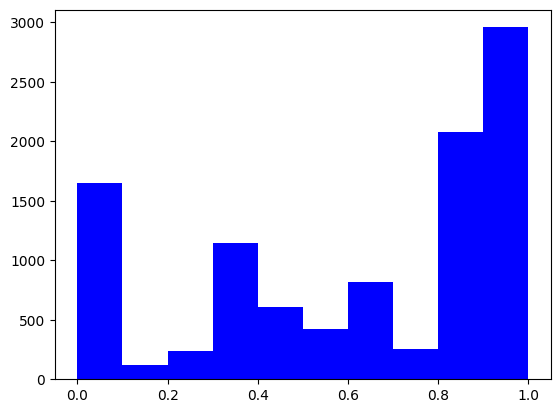

In [595]:
privateProbability = predictedProbabilities[:, encoder.transform(['Private'])[0]]

plt.hist(privateProbability, bins=10, range=(0, 1), color='blue')